In [32]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np

files = ["fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
        "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
        "mpi_N2_18_0","mpi_N2_18_1", "mpi_N4_18_0","mpi_N4_18_1",
        "mpi_N2_18_1-nf", "mpi_N4_18_1-nf", "fcio_18_1-nf", "wnio_18_1-nf",
        "fc_18_1-nf", "wn_18_1-nf", "fc_18_0-nolatency", "wn_18_0-nolatency",
        "fc_18_1-nolatency", "wn_18_1-nolatency"]
head = ('elem', 'n', 'pN', 'min_e', 'max_e', 'avg_e', 'size', 'nerror', 'l2_error')
# headmax = ('elem', 'n', 'pN', 'min_e', 'max_e', 'avg_e', 'size', 'nerror', 'l2_error')

headmain = ("elements",
        "fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
        "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
        "mpi_N2_18_0","mpi_N2_18_1", "mpi_N4_18_0","mpi_N4_18_1")
dataraw = pd.DataFrame(columns=headmain)
datafile = pd.read_csv('final_consolidated.csv'
                        , delimiter=',',
                          names=headmain, skiprows=1)
dataraw['elements'] = datafile['elements']

# print(data)
for file in files:
    filename = 'final_'+file+'.csv'
    print(filename)
    datafile = pd.read_csv(filename, delimiter=',',
                          names=head, skiprows=1)
    if "latency" in file:
        if "18_0" in file:
            file = file.replace('18_0-nolatency', 'nolat_18_0')
        else:
            file = file.replace('18_1-nolatency', 'nolat_18_1')
    if "-nf" in file:
        file = file.replace('18_1-nf', 'nf_18_1')

    dataraw[file+'_min'] = datafile['min_e']
    dataraw[file+'_max'] = datafile['max_e']
    dataraw[file] = datafile['avg_e']



dataraw = dataraw.sort_values(by=['elements'])
data_1k = dataraw[0:30]
data_2k = dataraw[30:60]
data_5k = dataraw[60:90]
data_10k = dataraw[90:120]
data_20k = dataraw[120:150]
data_50k = dataraw[150:180]
data_100k = dataraw[180:210]
data_200k = dataraw[210:240]

data = pd.DataFrame(columns=dataraw.columns)
data.loc['1k'] = data_1k.mean()
data.loc['2k'] = data_2k.mean()
data.loc['5k'] = data_5k.mean()
data.loc['10k'] = data_10k.mean()
data.loc['20k'] = data_20k.mean()
data.loc['50k'] = data_50k.mean()
data.loc['100k'] = data_100k.mean()
data.loc['200k'] = data_200k.mean()

for file in files:
    if "latency" in file:
        if "18_0" in file:
            file = file.replace('18_0-nolatency', 'nolat_18_0')
        else:
            file = file.replace('18_1-nolatency', 'nolat_18_1')
    if "-nf" in file:
        file = file.replace('18_1-nf', 'nf_18_1')
    data[file+'_min'] = data[file] - data[file+'_min']
    data[file+'_max'] = data[file+'_max'] - data[file]


/
# data['fc_mpi_N4_18_1'] = data['mpi_N4_18_1']/ data['fc_18_1']
# data['fc_mpi_N4_18_0'] = data['mpi_N4_18_0']/data['fc_18_0']

# data['fcio_mpi_N4_18_1'] = data['mpi_N4_18_1'] / data['fcio_18_1']
# data['fcio_mpi_N4_18_0'] = data['mpi_N4_18_0'] / data['fcio_18_0']

# data['wn_mpi_N2_18_1'] = data['mpi_N2_18_1'] / data['wn_18_1']
# data['wn_mpi_N2_18_0'] = data['mpi_N2_18_0'] / data['wn_18_0']

# data['wnio_mpi_N2_18_1'] = data['mpi_N2_18_1'] / data['wnio_18_1']
# data['wnio_mpi_N2_18_0'] = data['mpi_N2_18_0'] / data['wnio_18_0']
data = data.reset_index()
# data
# print(data[['elements','size']])
def add_annotation(ax, data, name):
    count = 0
    for index, entry in data.iterrows():
    
        if entry[name] > 1.0:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count,entry[name]), color='green',
                              textcoords='offset points', xytext=(-4,4),
                              bbox=dict(boxstyle="round", fc="1"))
        else:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count, entry[name]), color='red',
                              textcoords='offset points', xytext=(-4,4),
                              bbox=dict(boxstyle="round", fc="1"))
        count = count+1
def plot_data(ax, data1, data2, yerr):
    data1.plot(x='elements', kind='bar', rot = 0, ax=ax, yerr = yerr, capsize=4, colormap='Paired')
    ax2 = ax.twinx()
    data2.plot(x='index', linestyle='-', marker='o', color='c', ax = ax2)
    return ax2
    # print(data1[['elem','per_opt_mpi']])

def plot_comparison(designs, nrows=0, ncols=1, savename=None):
    figk_ax2 = []
    if nrows==0:
        nrows = len(designs)
    figk_fig, figk_ax  = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6,5), tight_layout=True)
    current = 0
    design1 = None
    design2 = None
    for d1, d2, vstr in designs:
        data[d2+'_'+d1+'_'+vstr] = data[d1+'_'+vstr]/ data[d2+'_'+vstr]
        print(d1, d2, vstr)
        design1 = d1
        design2 = d2
        ax = figk_ax[current]
        err = data[[d1+'_'+vstr+'_min',d1+'_'+vstr+'_max', d2+'_'+vstr+'_min',d2+'_'+vstr+'_max']].T.values
        ax2 = plot_data(ax, data[['elements', d1+'_'+vstr, d2+'_'+vstr]], data[['index',d2+'_'+d1+'_'+vstr]],
                        err)
        figk_ax2.append(ax2)
        add_annotation(ax2, data[['index',d2+'_'+d1+'_'+vstr]], d2+'_'+d1+'_'+vstr)
        figk_ax[current].set_title("\n".join(wrap(d2+'_'+d1+'_'+vstr, 60)))
        ax.set_xlabel('Mesh Elements')
        ax.set_ylabel('Time (in secs)')

        ax2.set_ylabel('Speedup', color='c')
        ax2.get_legend().remove()
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax.legend(h1+h2, [design1, design2, 'Speedup'], loc=1)
        current = current+1
     
    if savename == None:
        figk_fig.savefig(d2+'_'+d1+'.pgf')
        figk_fig.savefig(d2+'_'+d1+'.pdf')
    else:
        figk_fig.savefig(str(savename)+'.pgf')
        figk_fig.savefig(str(savename)+'.pdf')

def plot_speedupdata(ax, data, linestyle='-', color='c'):
    data.plot(x='index', linestyle=linestyle, marker='o', color=color, ax = ax)

def format_xaxis(value, tick_number):
#     if()
#     datasize = float("{0:.2f}".format(value/(1024*1024)))
    print("format axis")
    values = ['1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k']
    print(value, tick_number)
    return values[tick_number]

def plot_speedup(designs, colors, lines, title, savename=None, a=True, ):
    figk_ax2 = []
    figk_fig, figk_ax  = plt.subplots(figsize=(6,4), tight_layout=True)
    current = 0
    design1 = None
    design2 = None
#     figk_ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis)) 
    for d1, d2, vstr in designs:
        data[d2+'_'+d1+'_'+vstr] = data[d1+'_'+vstr]/ data[d2+'_'+vstr]
        print(d1, d2, vstr)
        design1 = d1
        design2 = d2
#         err = data[[d1+'_'+vstr+'_min',d1+'_'+vstr+'_max', d1+'_'+vstr+'_min',d1+'_'+vstr+'_max']].T.values
#         ax2 = plot_data(figk_ax[current], data[['elements', d1+'_'+vstr, d2+'_'+vstr]], data[['index',d2+'_'+d1+'_'+vstr]],
#                         err)
        plot_speedupdata(figk_ax, data[['index',d2+'_'+d1+'_'+vstr]], lines[current], colors[current])
#         figk_ax2.append(ax2)
        if a:
            add_annotation(figk_ax, data[['index',d2+'_'+d1+'_'+vstr]], d2+'_'+d1+'_'+vstr)
        
        current = current+1
    figk_ax.set_title("\n".join(wrap(title, 60)))
    figk_ax.set_ylabel('Speedup')
#     print(data['index'])
    figk_ax.set_xticklabels(['10','1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k'])
    figk_ax.set_xlabel('Mesh Elements')
    figk_ax.legend()
    

    if savename == None:
        savename =d2+'_'+d1
    
    print('Saving file in '+str(savename))
    figk_fig.savefig(str(savename)+'.pgf')
    figk_fig.savefig(str(savename)+'.pdf')


#     return datasize     


final_fc_18_0.csv
final_fc_18_1.csv
final_fcio_18_0.csv
final_fcio_18_1.csv
final_wn_18_0.csv
final_wn_18_1.csv
final_wnio_18_0.csv
final_wnio_18_1.csv
final_mpi_N2_18_0.csv
final_mpi_N2_18_1.csv
final_mpi_N4_18_0.csv
final_mpi_N4_18_1.csv
final_mpi_N2_18_1-nf.csv
final_mpi_N4_18_1-nf.csv
final_fcio_18_1-nf.csv
final_wnio_18_1-nf.csv
final_fc_18_1-nf.csv
final_wn_18_1-nf.csv
final_fc_18_0-nolatency.csv
final_wn_18_0-nolatency.csv
final_fc_18_1-nolatency.csv
final_wn_18_1-nolatency.csv


<IPython.core.display.Javascript object>


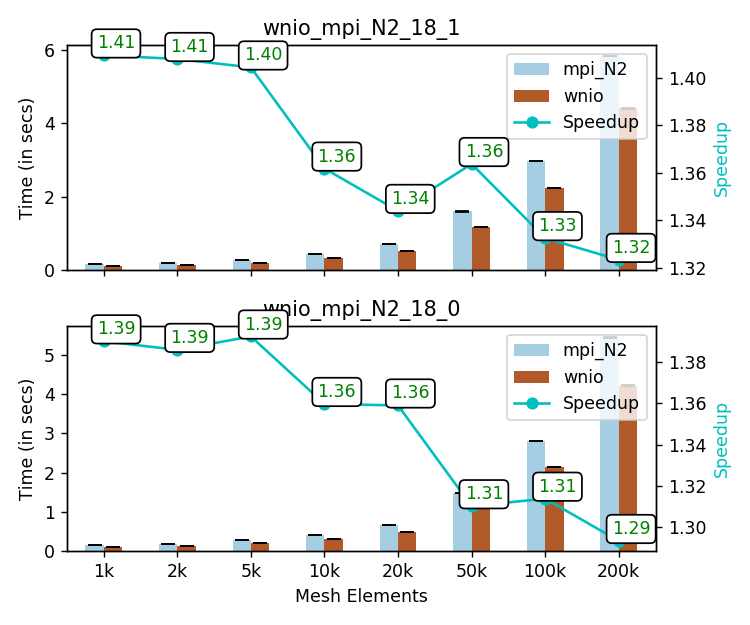

mpi_N2 wnio 18_1
mpi_N2 wnio 18_0


<IPython.core.display.Javascript object>


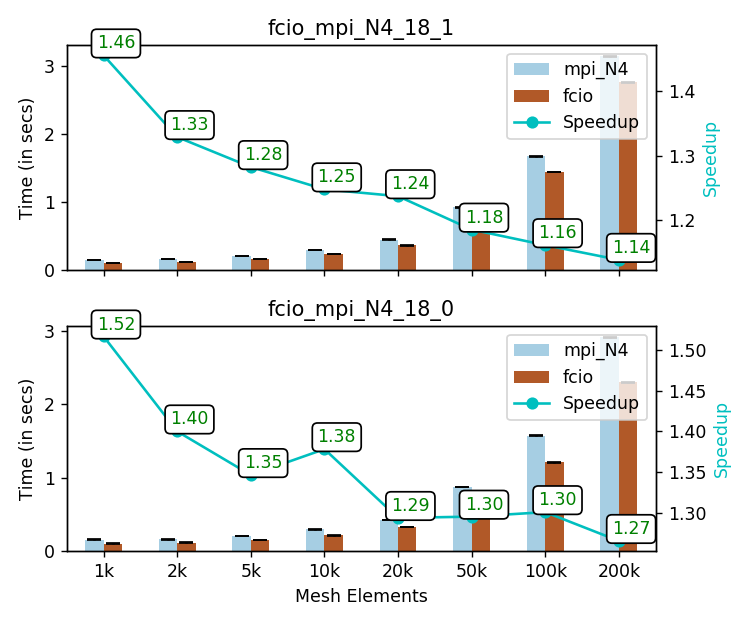

mpi_N4 fcio 18_1
mpi_N4 fcio 18_0


In [33]:
############################################
# MPI vs IO channels
############################################


designs = [['mpi_N2', 'wnio', '18_1'], ['mpi_N2', 'wnio', '18_0'], ['mpi_N4', 'fcio', '18_1'], ['mpi_N4', 'fcio', '18_0']]

plot_comparison(designs[:2], savename='comp_mpiio_1')
plot_comparison(designs[2:], savename='comp_mpiio_2')

colors = ['c','r','g','b']
lines = ['-','-',':',':']
# plot_speedup(designs, colors, lines, 'Compararions of MPI MIDG2 and IO channels designs', savename='mpiio_all', a=False)


<IPython.core.display.Javascript object>


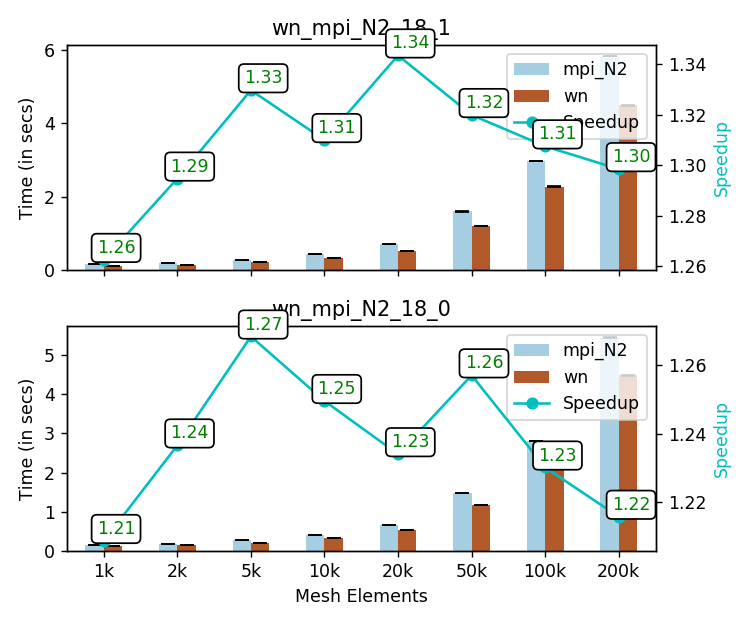

mpi_N2 wn 18_1
mpi_N2 wn 18_0


<IPython.core.display.Javascript object>


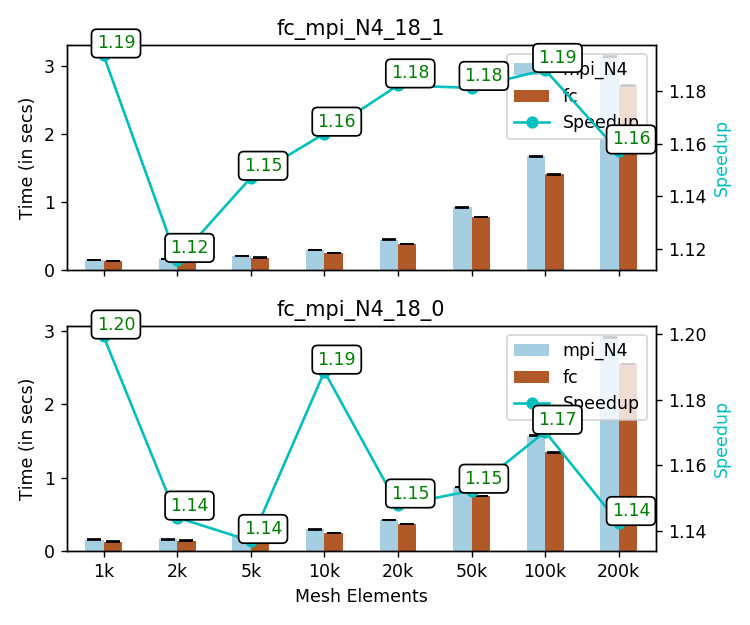

mpi_N4 fc 18_1
mpi_N4 fc 18_0


In [34]:
############################################
# MPI vs FPGA ONLY channels
############################################


designs = [['mpi_N2', 'wn', '18_1'], ['mpi_N2', 'wn', '18_0'], ['mpi_N4', 'fc', '18_1'], ['mpi_N4', 'fc', '18_0']]

plot_comparison(designs[:2], savename='comp_mpifpgaonly_1')
plot_comparison(designs[2:], savename='comp_mpifpgaonly_2')



<IPython.core.display.Javascript object>


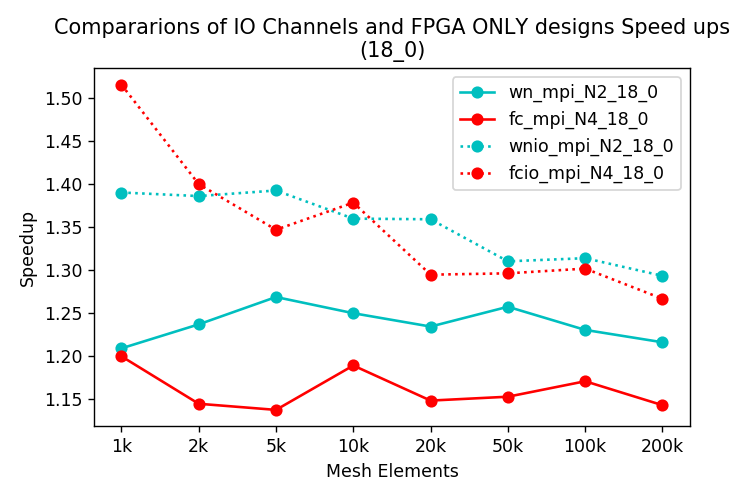

mpi_N2 wn 18_0
mpi_N4 fc 18_0
mpi_N2 wnio 18_0
mpi_N4 fcio 18_0
Saving file in iompifpgaonly_all_18_0


<IPython.core.display.Javascript object>


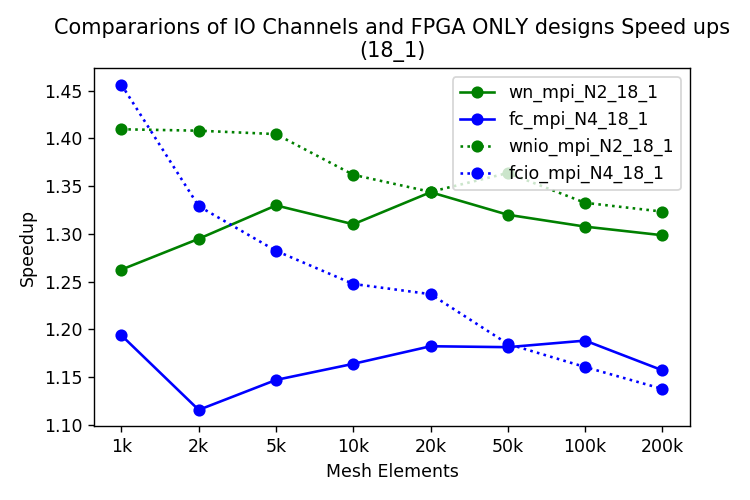

mpi_N2 wn 18_1
mpi_N4 fc 18_1
mpi_N2 wnio 18_1
mpi_N4 fcio 18_1
Saving file in iompifpgaonly_all_18_1


In [35]:
designs1 = [['mpi_N2', 'wn', '18_0'], ['mpi_N4', 'fc', '18_0'],
          ['mpi_N2', 'wnio', '18_0'], ['mpi_N4', 'fcio', '18_0']]
colors = ['c','r','c','r']
lines = ['-','-',':',':',]

plot_speedup(designs1, colors, lines, 'Compararions of IO Channels and FPGA ONLY designs Speed ups (18_0)', savename='iompifpgaonly_all_18_0', a=False)


designs2 = [['mpi_N2', 'wn', '18_1'], ['mpi_N4', 'fc', '18_1'], 
          ['mpi_N2', 'wnio', '18_1'], ['mpi_N4', 'fcio', '18_1']]
colors = ['g','b', 'g','b']
lines = ['-','-',':',':',]

plot_speedup(designs2, colors, lines, 'Compararions of IO Channels and FPGA ONLY designs Speed ups (18_1)', savename='iompifpgaonly_all_18_1', a=False)


<IPython.core.display.Javascript object>


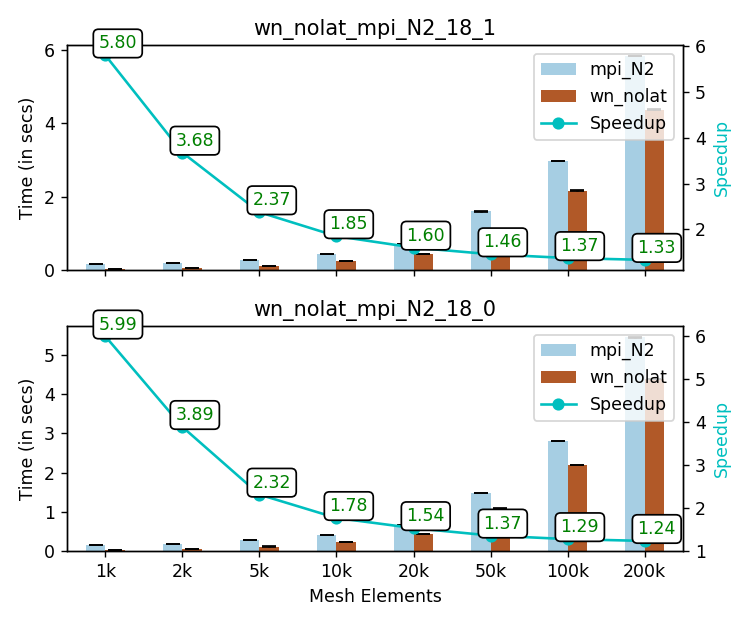

mpi_N2 wn_nolat 18_1
mpi_N2 wn_nolat 18_0


<IPython.core.display.Javascript object>


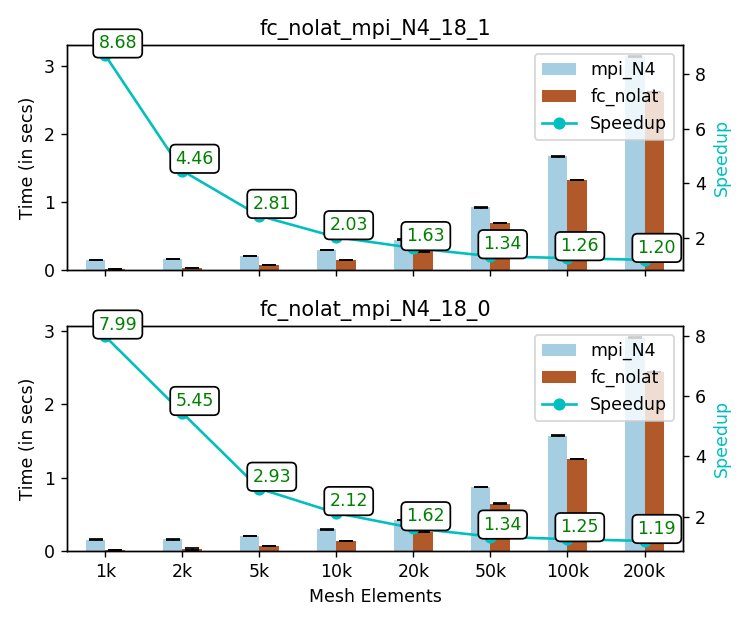

mpi_N4 fc_nolat 18_1
mpi_N4 fc_nolat 18_0


In [36]:
############################################
# MPI vs FPGA ONLY channels (No Latency)
############################################


designs = [['mpi_N2', 'wn_nolat', '18_1'], ['mpi_N2', 'wn_nolat', '18_0'], ['mpi_N4', 'fc_nolat', '18_1'], ['mpi_N4', 'fc_nolat', '18_0']]

plot_comparison(designs[:2], savename='comp_mpifpgaonly_nolat_1')
plot_comparison(designs[2:], savename='comp_mpifpgaonly_nolat_2')

<IPython.core.display.Javascript object>


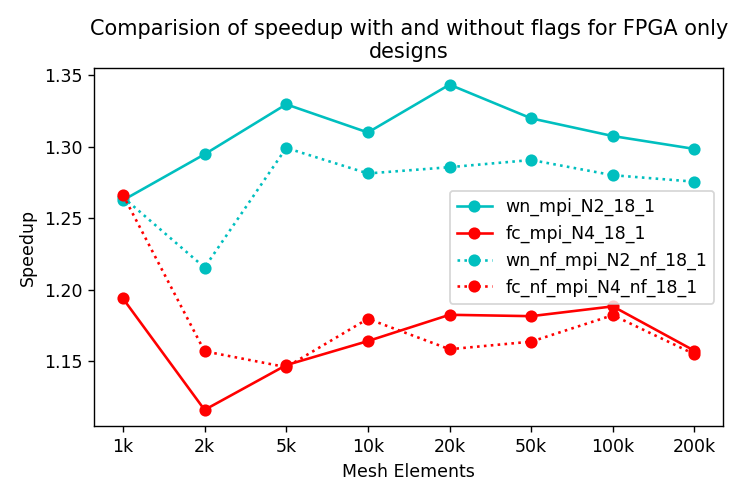

mpi_N2 wn 18_1
mpi_N4 fc 18_1
mpi_N2_nf wn_nf 18_1
mpi_N4_nf fc_nf 18_1
Saving file in flag_noflg_fpgaonly


<IPython.core.display.Javascript object>


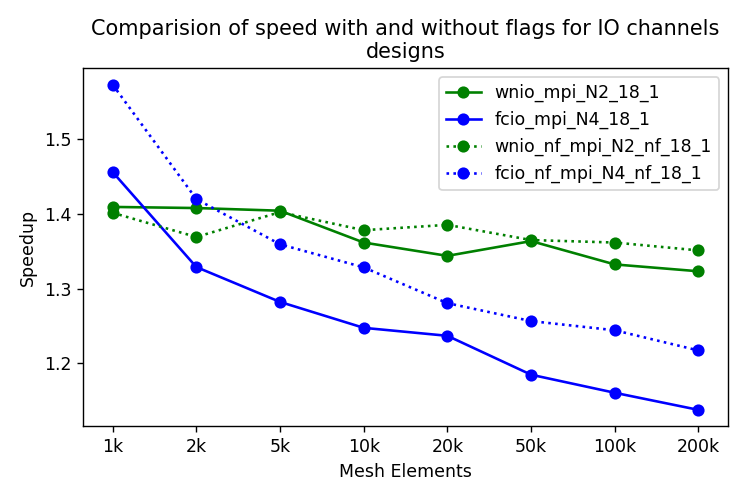

mpi_N2 wnio 18_1
mpi_N4 fcio 18_1
mpi_N2_nf wnio_nf 18_1
mpi_N4_nf fcio_nf 18_1
Saving file in flag_noflg_iochan


In [37]:
# designs1 = [['mpi_N2_nf', 'wn_nf', '18_1'], ['mpi_N4_nf', 'fc_nf', '18_1'],
#           ['mpi_N2_nf', 'wnio_nf', '18_1'], ['mpi_N4_nf', 'fcio_nf', '18_1']]
# colors = ['c','r','c','r']
# lines = ['-','-',':',':',]

# plot_speedup(designs1, colors, lines, 'Comparision of the speedup with No mememory optimization flags', savename='noflags', a=False)


designs2 = [['mpi_N2', 'wn', '18_1'], ['mpi_N4', 'fc', '18_1'], 
          ['mpi_N2_nf', 'wn_nf', '18_1'], ['mpi_N4_nf', 'fc_nf', '18_1']]
colors = ['c','r','c','r']
lines = ['-','-',':',':',]

plot_speedup(designs2, colors, lines, 'Comparision of speedup with and without flags for FPGA only designs', savename='flag_noflg_fpgaonly', a=False)


designs3 = [['mpi_N2', 'wnio', '18_1'], ['mpi_N4', 'fcio', '18_1'], 
          ['mpi_N2_nf', 'wnio_nf', '18_1'], ['mpi_N4_nf', 'fcio_nf', '18_1']]
colors = ['g','b', 'g','b']
lines = ['-','-',':',':',]

plot_speedup(designs3, colors, lines, 'Comparision of speed with and without flags for IO channels designs ', savename='flag_noflg_iochan', a=False)


# designs4 = [['mpi_N2', 'mpi_N2_nf', '18_1'], ['mpi_N4', 'mpi_N4_nf', '18_1']]
# colors = ['g','b', 'g','b']
# lines = ['-','-',':',':',]

# plot_speedup(designs4, colors, lines, 'Comparision of speed with and without flags for IO channels designs ', savename='mpi_noflg_iochan', a=False)
